# Univariate Time Series

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_error
import seaborn as sns 

In [4]:
file=r'C:\Users\ARUNA\Deep Learning Edvancer/Download Data/international-airline-passengers.csv'

In [5]:
data = pd.read_csv(file)

In [6]:
data.head()

,Month,passengers_in_100_thousands
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
data.tail()

,Month,passengers_in_100_thousands
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [8]:
ts_data=data.iloc[:,1]

In [10]:
ts_data.shape

(144,)

In [12]:
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(pd.DataFrame(ts_data))
# MinMaxScaler needs the data in 2D array , thats why the syntactical jugglery above

In [13]:
train_fraction = 0.70

train_size = int(len(dataset) * train_fraction)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

In [14]:
train

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [15]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))



In [16]:
window_size = 10
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

Original training data shape:
(90, 10)


In [17]:
train_X

array([[0.01544402, 0.02702703, 0.05405405, 0.04826255, 0.03281853,
        0.05984556, 0.08494208, 0.08494208, 0.06177606, 0.02895753],
       [0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556,
        0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ],
       [0.05405405, 0.04826255, 0.03281853, 0.05984556, 0.08494208,
        0.08494208, 0.06177606, 0.02895753, 0.        , 0.02702703],
       [0.04826255, 0.03281853, 0.05984556, 0.08494208, 0.08494208,
        0.06177606, 0.02895753, 0.        , 0.02702703, 0.02123552],
       [0.03281853, 0.05984556, 0.08494208, 0.08494208, 0.06177606,
        0.02895753, 0.        , 0.02702703, 0.02123552, 0.04247104],
       [0.05984556, 0.08494208, 0.08494208, 0.06177606, 0.02895753,
        0.        , 0.02702703, 0.02123552, 0.04247104, 0.07142857],
       [0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ,
        0.02702703, 0.02123552, 0.04247104, 0.07142857, 0.05984556],
       [0.08494208, 0.06177606, 0.0289575

In [18]:
train_Y

array([0.        , 0.02702703, 0.02123552, 0.04247104, 0.07142857,
       0.05984556, 0.04054054, 0.08687259, 0.12741313, 0.12741313,
       0.1042471 , 0.05598456, 0.01930502, 0.06949807, 0.07915058,
       0.08880309, 0.14285714, 0.11389961, 0.13127413, 0.14285714,
       0.18339768, 0.18339768, 0.15444015, 0.11196911, 0.08108108,
       0.11969112, 0.12934363, 0.14671815, 0.17181467, 0.14864865,
       0.15250965, 0.22007722, 0.24324324, 0.26640927, 0.2027027 ,
       0.16795367, 0.13127413, 0.17374517, 0.17760618, 0.17760618,
       0.25482625, 0.25289575, 0.24131274, 0.26833977, 0.30888031,
       0.32432432, 0.25675676, 0.20656371, 0.14671815, 0.18725869,
       0.19305019, 0.16216216, 0.25289575, 0.23745174, 0.25096525,
       0.30888031, 0.38223938, 0.36486486, 0.2992278 , 0.24131274,
       0.19111969, 0.24131274, 0.26640927, 0.24903475, 0.31467181,
       0.31853282, 0.32046332, 0.40733591, 0.5019305 , 0.46911197,
       0.4015444 , 0.32818533, 0.25675676, 0.33590734, 0.34749

In [19]:
pd.DataFrame(train_X).head()

,0,1,2,3,4,5,6,7,8,9
0,0.015444,0.027027,0.054054,0.048263,0.032819,0.059846,0.084942,0.084942,0.061776,0.028958
1,0.027027,0.054054,0.048263,0.032819,0.059846,0.084942,0.084942,0.061776,0.028958,0.000000
2,0.054054,0.048263,0.032819,0.059846,0.084942,0.084942,0.061776,0.028958,0.000000,0.027027
3,0.048263,0.032819,0.059846,0.084942,0.084942,0.061776,0.028958,0.000000,0.027027,0.021236
4,0.032819,0.059846,0.084942,0.084942,0.061776,0.028958,0.000000,0.027027,0.021236,0.042471


In [20]:
train_X.shape, train_Y.shape

((90, 10), (90,))

In [21]:
# # shape of data should be : (num_obs,  sequence_length,feature_dimension)
train_X = np.reshape(train_X, (train_X.shape[0],  train_X.shape[1],1))
test_X = np.reshape(test_X, (test_X.shape[0],  test_X.shape[1],1))
print("New training data shape:")
print(train_X.shape)

New training data shape:
(90, 10, 1)


In [22]:
# input shape : (feature_dimension, seq_length)
model = Sequential()
    
    
model.add(LSTM(4, 
               input_shape = (window_size, 1)))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", 
              optimizer = "adam")
model.fit(train_X, 
          train_Y, 
          epochs = 100, 
          batch_size = 1, 
          verbose = 2,shuffle=False)

Train on 90 samples
Epoch 1/100
90/90 - 10s - loss: 0.0056
Epoch 2/100
90/90 - 1s - loss: 0.0106
Epoch 3/100
90/90 - 1s - loss: 0.0079
Epoch 4/100
90/90 - 1s - loss: 0.0062
Epoch 5/100
90/90 - 1s - loss: 0.0054
Epoch 6/100
90/90 - 1s - loss: 0.0050
Epoch 7/100
90/90 - 1s - loss: 0.0048
Epoch 8/100
90/90 - 1s - loss: 0.0046
Epoch 9/100
90/90 - 1s - loss: 0.0045
Epoch 10/100
90/90 - 1s - loss: 0.0045
Epoch 11/100
90/90 - 1s - loss: 0.0044
Epoch 12/100
90/90 - 1s - loss: 0.0044
Epoch 13/100
90/90 - 1s - loss: 0.0043
Epoch 14/100
90/90 - 1s - loss: 0.0043
Epoch 15/100
90/90 - 1s - loss: 0.0043
Epoch 16/100
90/90 - 1s - loss: 0.0042
Epoch 17/100
90/90 - 1s - loss: 0.0042
Epoch 18/100
90/90 - 1s - loss: 0.0041
Epoch 19/100
90/90 - 1s - loss: 0.0041
Epoch 20/100
90/90 - 1s - loss: 0.0041
Epoch 21/100
90/90 - 1s - loss: 0.0040
Epoch 22/100
90/90 - 1s - loss: 0.0040
Epoch 23/100
90/90 - 1s - loss: 0.0040
Epoch 24/100
90/90 - 1s - loss: 0.0039
Epoch 25/100
90/90 - 1s - loss: 0.0039
Epoch 26/100


In [25]:
# Make predictions on the original scale of the data.
pred = scaler.inverse_transform(model.predict(train_X))
# Prepare Y data to also be on the original scale for interpretability.
orig_data = scaler.inverse_transform([train_Y])
# Calculate RMSE.
score_train = mean_absolute_error(orig_data[0], pred[:, 0])

In [27]:
# Make predictions on the original scale of the data.
pred = scaler.inverse_transform(model.predict(test_X))
# Prepare Y data to also be on the original scale for interpretability.
orig_data = scaler.inverse_transform([test_Y])
# Calculate RMSE.
score_test = mean_absolute_error(orig_data[0], pred[:, 0])

In [28]:
print("Training data score: ",  score_train)
print("Test data score: ",  score_test)

Training data score:  20.088211483425564
Test data score:  40.6199753705193


In [29]:
original_data=np.concatenate([scaler.inverse_transform([train_Y])[0],scaler.inverse_transform([test_Y])[0]])

In [30]:
fitted=np.concatenate([scaler.inverse_transform(model.predict(train_X))[:,0],
                     scaler.inverse_transform(model.predict(test_X))[:,0]])

In [31]:

d=pd.DataFrame({'original':original_data,'fitted':fitted,'index':range(len(original_data))})

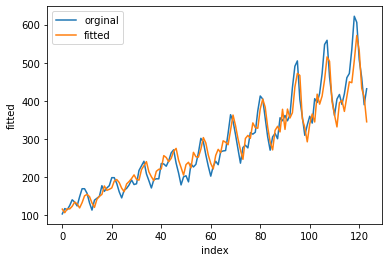

In [33]:
sns.lineplot(data=d,x='index',y='original',label='orginal')
sns.lineplot(data=d,x='index',y='fitted',label='fitted')